In [13]:
import numpy as np
#import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
import utils
from utils import *

#Reading Data
df = pd.read_csv('ratings2.csv', lineterminator='\n')
df.head()

,Name,Date,Rating,Review
0,aplehanov,"Jun 27, 2020",0.0,"Сейчас при старте игры выводится лозунг ""Blac..."
1,Mr_GMG,"Dec 14, 2017",3.0,One of the most boring games I have played. 6...
2,xavia91,"Nov 30, 2017",4.0,"The graphics are quite nice, but that is abou..."
3,Jacob07P,"Dec 31, 2017",3.0,Destiny 2 promised a lot. After playing throu...
4,Thepexxxo,"Dec 11, 2017",0.0,Boring shooter. You can't even imagine HOW BA...


In [14]:
df = df[['Rating', "Review"]]
df.head()

,Rating,Review
0,0.0,"Сейчас при старте игры выводится лозунг ""Blac..."
1,3.0,One of the most boring games I have played. 6...
2,4.0,"The graphics are quite nice, but that is abou..."
3,3.0,Destiny 2 promised a lot. After playing throu...
4,0.0,Boring shooter. You can't even imagine HOW BA...


In [15]:
# Split data by reviews types
print(f'Positive >= 7: {len(df.loc[df["Rating"] >= 7])}')
print(f'Negative <= 5: {len(df.loc[df["Rating"] <= 5])}')
print(f'5 < Neutral < 7: {len(df.loc[(df["Rating"] > 5) & (df["Rating"] < 7)])}')

Positive >= 7: 145
Negative <= 5: 281
5 < Neutral < 7: 22


In [16]:
#Excluding big reviews (more than 3.000 char)
long_reviews = df.loc[df['Review'].str.len() > 3000].index
df.drop(long_reviews, inplace=True)
print(len(df.loc[df["Rating"] < 100]))

430


('game', 220)
('Destiny', 101)
('play', 65)
('good', 58)
('like', 57)
('story', 53)
('game.', 51)
('fun', 50)
('played', 49)
("it's", 42)
('feels', 38)
('в', 38)
('games', 32)
('и', 31)
('game,', 29)
('love', 27)
('best', 26)
('time', 24)
('great', 24)
('Bungie', 24)
('playing', 24)
('lot', 23)
('gameplay', 23)
('amazing', 23)
('не', 22)
('feel', 20)
('new', 20)
("don't", 20)
('people', 19)
('que', 19)


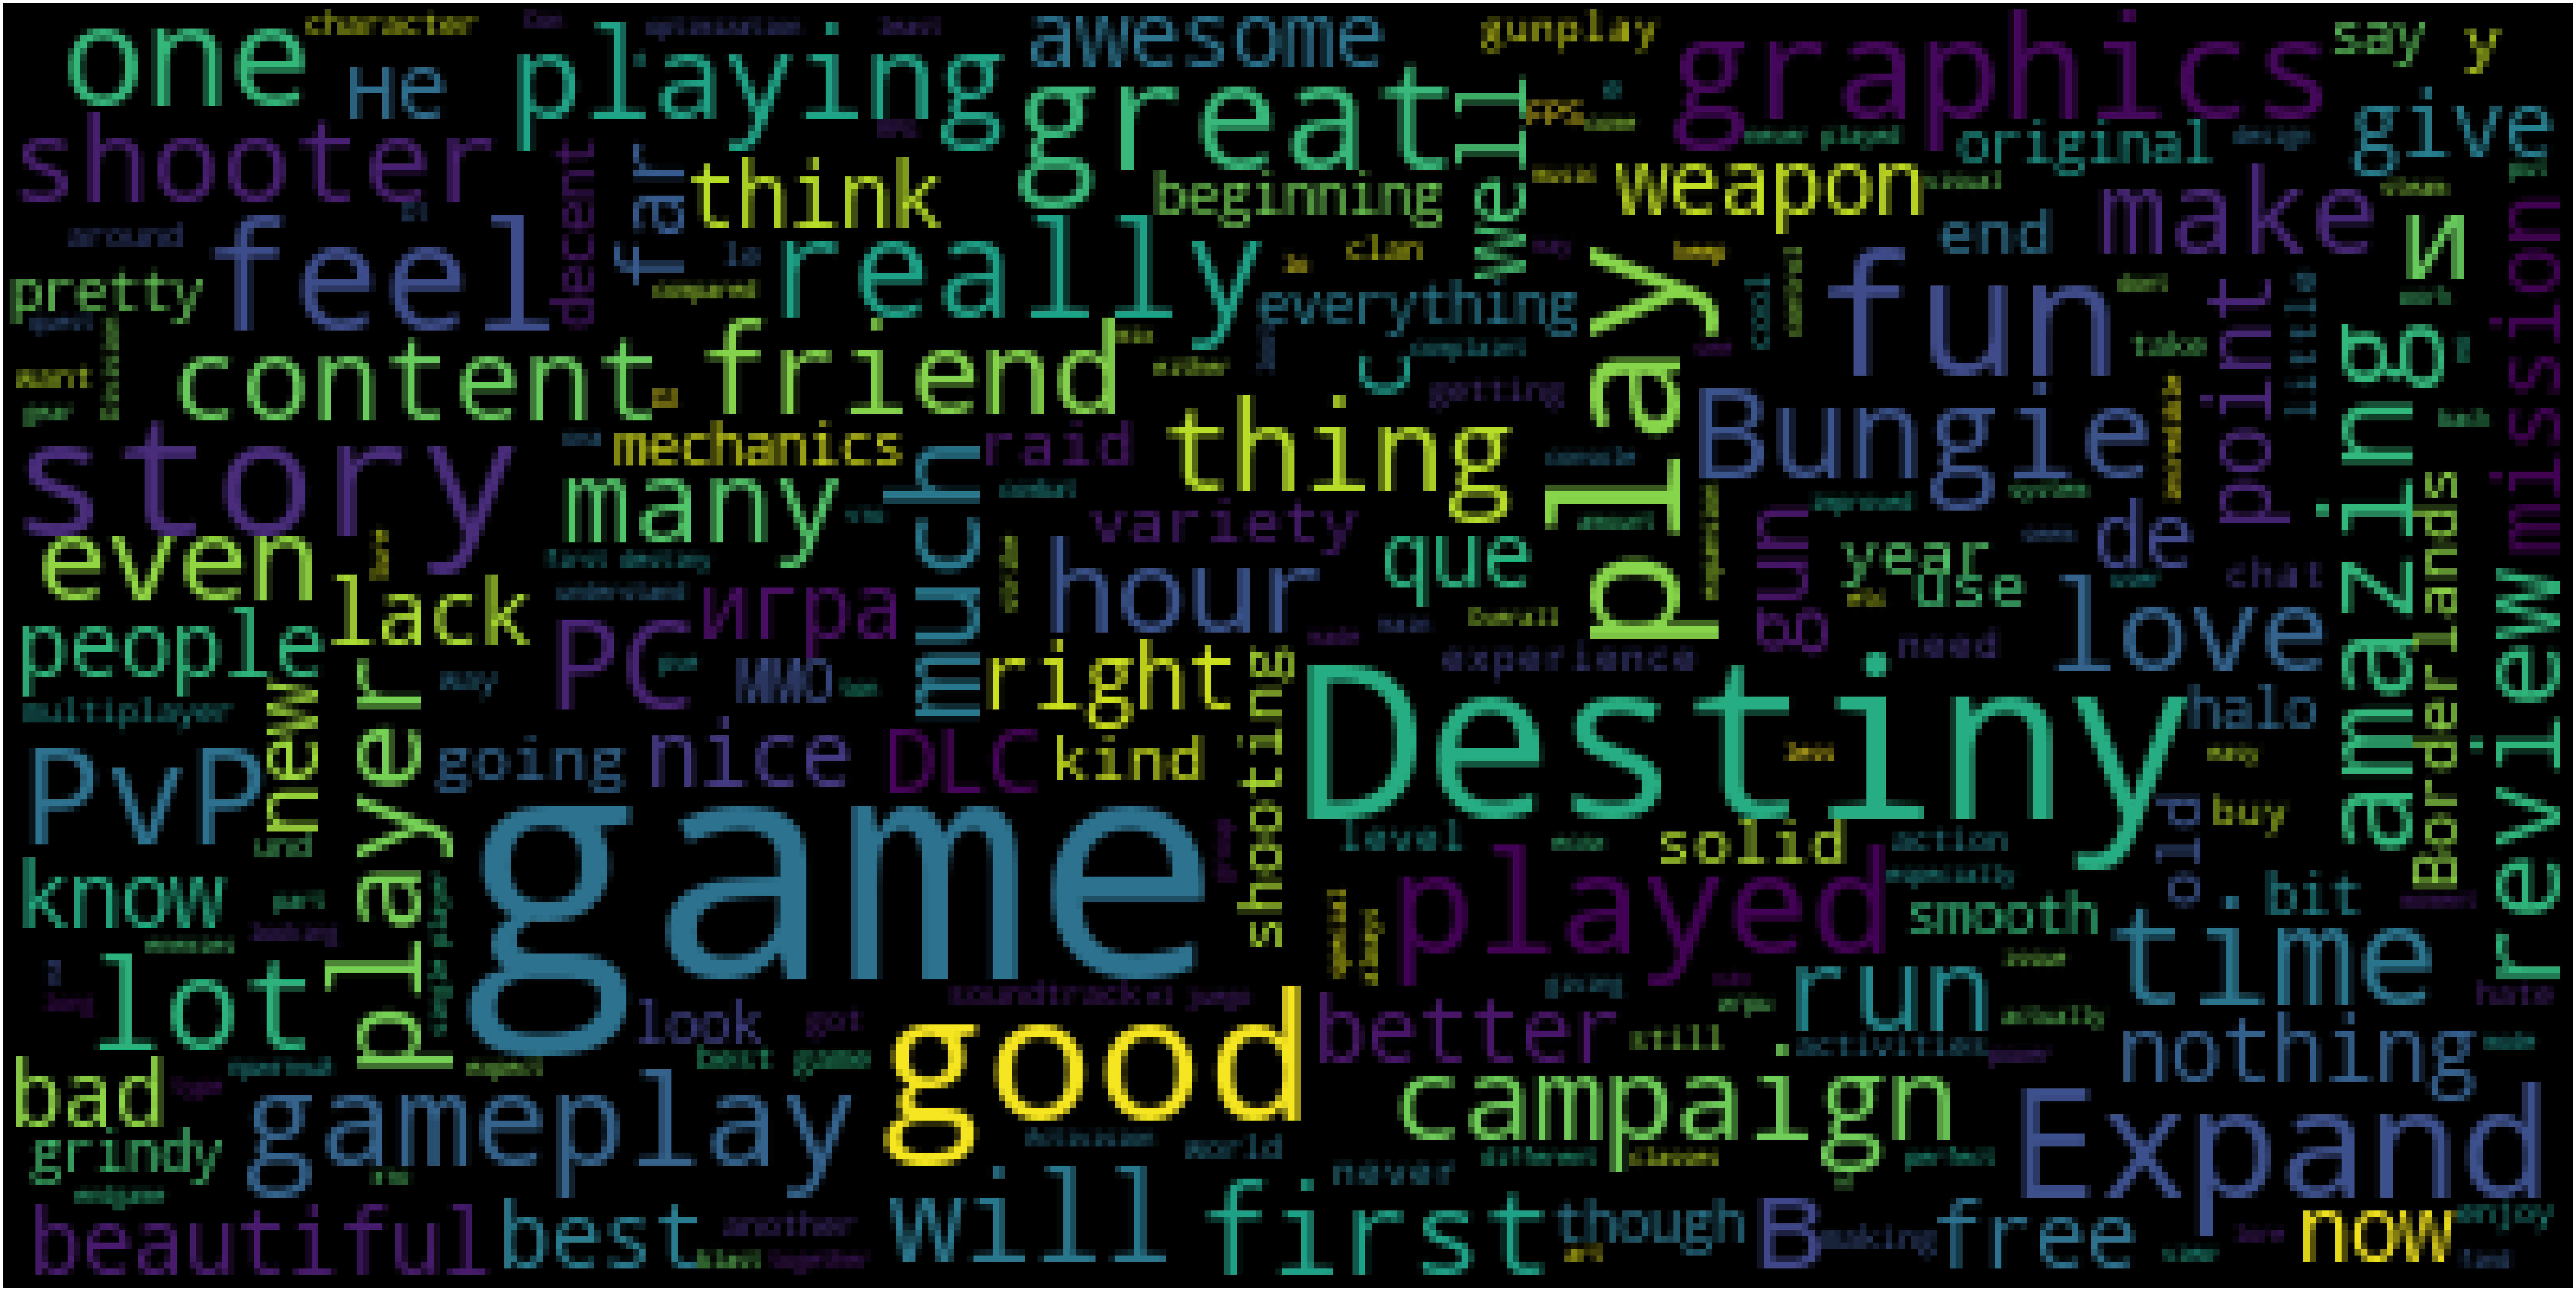

In [17]:

#Analyszing data of positive reviews
positive_reviews=df[df['Rating']>=7]
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in positive_reviews['Review']:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#List with the most repeated words
for i in range ( 30 ):
   print(repeated_words[i] )
#Cloud with positive reviews words
word_cloud(positive_reviews['Review'],'black','Most Used Words')